<a href="https://colab.research.google.com/github/Shreeraj98/Statistical-Toolbox-for-easy-access/blob/main/Tools/Clustering_%26_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧬 **Clustering & Classification**

Group or categorize data using K-means, hierarchical methods, and logistic regression.

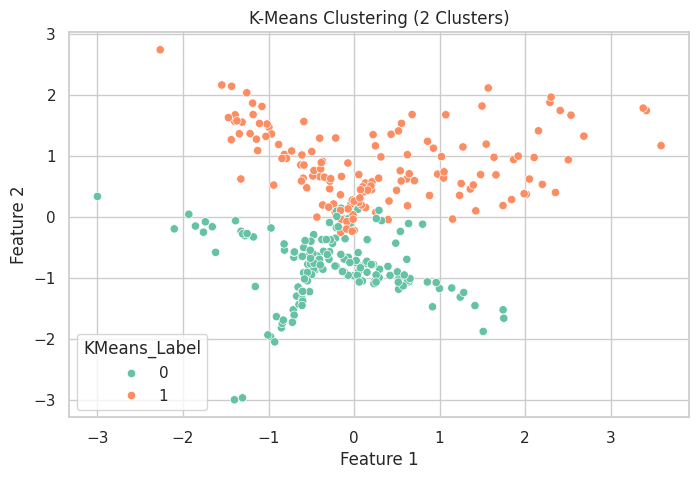

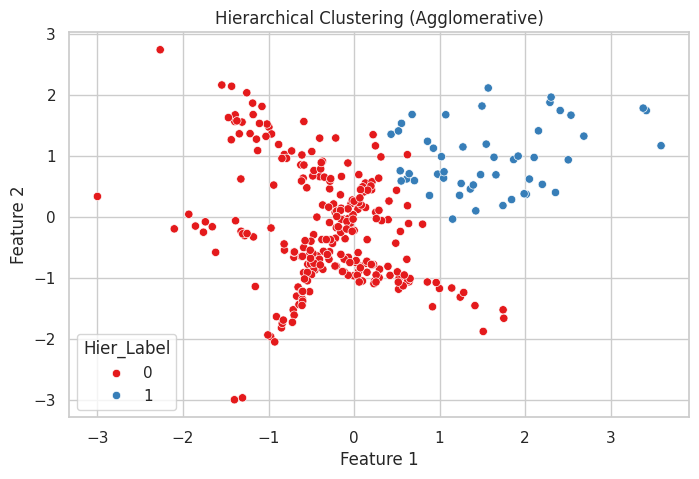

✅ Classification Report:

              precision    recall  f1-score   support

         Ham       0.85      0.89      0.87        37
        Spam       0.89      0.84      0.86        38

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



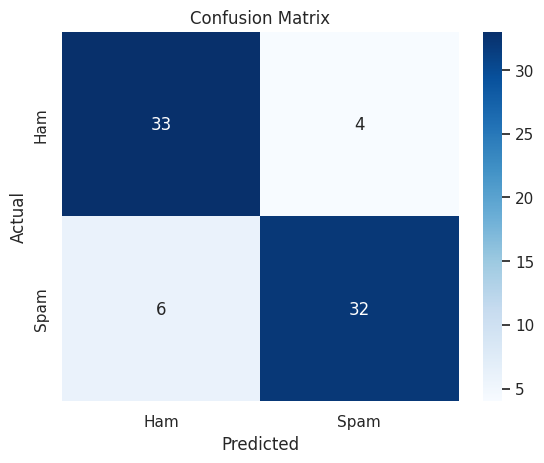

Accuracy: 0.87


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set(style="whitegrid")

# -------------------------------------------
# 📦 Simulate Dataset for Email Classification
# Features: word frequency, email length, special chars etc.
# -------------------------------------------
X, y = make_classification(n_samples=300, n_features=4, n_informative=3,
                           n_redundant=0, n_classes=2, random_state=42)
# y = 0 (ham), 1 (spam)
df = pd.DataFrame(X, columns=['Word_Freq', 'Char_Count', 'Link_Count', 'Special_Chars'])
df['Spam'] = y

# -------------------------------------------
# 📊 K-Means Clustering
# -------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
df['KMeans_Label'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['KMeans_Label'], palette='Set2')
plt.title("K-Means Clustering (2 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# -------------------------------------------
# 🧬 Hierarchical Clustering
# -------------------------------------------
agg = AgglomerativeClustering(n_clusters=2)
df['Hier_Label'] = agg.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Hier_Label'], palette='Set1')
plt.title("Hierarchical Clustering (Agglomerative)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# -------------------------------------------
# 🔍 Logistic Regression (Classification)
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# -------------------------------------------
# 🧾 Evaluation Metrics
# -------------------------------------------
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print metrics separately
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
